**Computational Component - HW3 - PHYS421**

Goal: construct a wave packet and visualize group velocity versus phase velocity

1.) Given a **phase wave**, $y = Acos(kx − ωt)$:

Choose a set of parameters (e.g., $k = 8$) and
plot $y$ versus $x$ for $t = 0, t = T/5, t = T/4$ , etc (all in one figure). Change the sign of $k$
and explore the direction of wave propagation. Determine the phase velocity. [Turn in one
representative summarizing plot/page with info on chosen parameters and explanation of
your finding]

**ANS:**

---

* The larger the k value, the greater the frequency of the wave/the shorter the wavelength.

* And, of course, changing the sign of the angular frequency in the sinusoidal function will change the direction of propogation

* The phase velocity of the wave is related to the wavenumber and angular frequency via the **Wave Equation**:

$w$ (Angular frequency) / $k$ (Wavenumber) = $v_{phase}$ (Phase velocity)

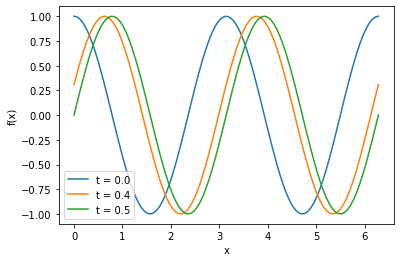

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Wave Parameters:
A = 1           # Amplitude
k = 2           # Wavenumber
w = np.pi       # Angular Frequency
T = 2*np.pi/w   # Period

# Spatial and Temporal Data
x = np.linspace(0,2*np.pi,100)
t = np.array([0, T/5, T/4])

# Plotting
for i in range(len(t)):
  plt.plot(x, A*np.cos(k*x-w*t[i]), label='t = '+str(t[i]))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

2) Construct an **initial wave packet** (t = 0) by superimposing phase waves:

Plot
$y_i = A_icos(k_ix)$ (with $i = 1, 2, .., N;$ choose $N = 20$) as well as the superposition $\sum_{i=1}^{N} y_i$
(wave packet) as a function of $x$ in one figure, and check if the superposition signal ”makes
sense”. Assume that the phase vectors $k_i$ differ for different $i$, and choose them all close
to the $k$-value from problem 1). It is fine to assume fixed amplitudes. Explore the wave
packet by varying the $k_i$ and by varying $N$. [Turn in one representative plot with info on
chosen parameters and explanation of your finding]

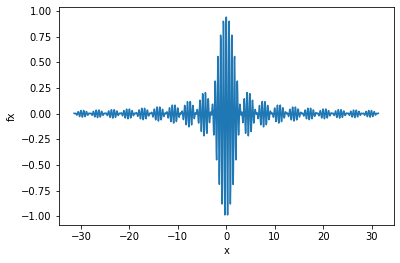

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Wave Parameters:
N = 200
A = np.linspace(1,1,N)
k_start = 10
k_end = 12
k = np.linspace(k_start,k_end,N)
w = 2*np.pi
T = 2*np.pi/w

# Spatial and Temporal Data
x = np.linspace(-10*np.pi,10*np.pi,1000)
t = 0

def cosine_sum(num_sum, time):
  summation_of_cosines = 0
  for i in range(num_sum):
    summation_of_cosines = summation_of_cosines + A[i]*np.cos(k[i]*x-w*time)
  return summation_of_cosines

# Plotting
plt.plot(x, cosine_sum(N,t)/N)
plt.xlabel('x')
plt.ylabel('fx')
plt.show()

3) **Propagation of wave packet**:

Consider the initial wave packet from problem 2)
[where $k_i$ are all close to $k$] and let it evolve in time using $y_i = A_icos(k_ix − ω_it)$ and
$ω_i = k_i^2$
(disregard dimension!). In one figure, plot both, your wave packet at time $t = 0$
and at times $t > 0$. Determine the velocity with which the wave packet is traveling (group
velocity). [Turn in one representative plot with info on chosen parameters and explanation
of your finding]. turning in a movie instead of the plot would be perfect also!

4) Repeat 3) by using $ω_i = 2k_i$
. [Turn in one representative plot (or movie) with info
on chosen parameters and explanation of your finding

---

**ANS:**
The larger you increase N, the farther apart the wavepackets in all of space are. The larger the k value, which in turn, the larger the omega value the faster the group velocity of the wave is.

The group velocity of the waves or wavepacket in 3) is 2*k and the group velocity in 4) is 2 which doesn't depend on k.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
#----------------------------------
# Defining Animation Function
def animate_func(x,uarr,tarr,nstep):
    fig, ax = plt.subplots()
    line, = ax.plot([],[],'r')
    ax.set_ylim(-N,N)
    ax.set_xlim(x.min(),x.max())
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\Psi(x)$')
    def update_line(i):
        line.set_ydata(data[i])
        line.set_xdata(x)
        return line,
    data = []
    for i in range(0,len(tarr),nstep):
        data.append(uarr[i])
    nfrm = int(len(data))
    ani = animation.FuncAnimation(fig, update_line, frames=nfrm, interval=1, blit=True, repeat=True,cache_frame_data=True)
    plt.show()
    return ani
#----------------------------------
# Wave Parameters:
N = 2000
k_start = 50
k_end = 51
#k2_start = 1.95
#k2_end = 2.05
k = np.linspace(k_start,k_end,N)
#k = np.append(k, np.linspace(k2_start,k2_end,N))
#N = 2*N
A = np.linspace(1,1,N)
w1 = np.array([i*i for i in k])
w2 = np.array([2*i for i in k])

# Spatial and Temporal Data
num_x = 1000
num_t = 500
x = np.linspace(-100*np.pi,100*np.pi,num_x)
y_w1 = []
y_w2 = []
t = np.linspace(0,60,num_t)

# Summation of cosine functions
def cosine_sum(num_sum, space, time, omega):
  summation_of_cosines = 0
  for i in range(num_sum):
    summation_of_cosines = summation_of_cosines + A[i]*np.cos(k[i]*x-omega[i]*time)
  return summation_of_cosines

# Plotting
print("Plot with $\omega$ values of $ω_i = k_i^2$")
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
for i in range(len(t)):
  y_w1.append(cosine_sum(N, x, t[i], w1))
  plt.plot(x, y_w1[i])
plt.show()

print("Plot with $\omega$ values of $ω_i = 2k_i$")
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
for i in range(len(t)):
  y_w2.append(cosine_sum(N, x, t[i], w2))
  plt.plot(x, y_w2[i])
plt.show()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animation(s)
nstep=1
ani = animate_func(x,y_w1,t,nstep)
ani
#ani.save('wavepacket2.mp4', writer=writer)
#ani2 = animate_func(x,y_w2,t,nstep)
#ani2


Output hidden; open in https://colab.research.google.com to view.